Задание 1. Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную states.

In [1]:
import numpy as np
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))
state_wheather = ("sunny", "cloudy", "rainy")

states = np.array(0)
states = np.delete(states, 0)
a = np.transpose(np.array((1, 0, 0)))
b=0
for i in range(20000):
    b = np.random.random()
    mask = a == 1
    #print((a*transition_matrix)[2][mask],b)
    if b<(a*transition_matrix)[0][mask]:
        a = np.transpose(np.array((1, 0, 0)))
        states = np.append(states,0)
    elif b<1 - (a*transition_matrix)[2][mask]:
        a = np.transpose(np.array((0, 1, 0)))
        states = np.append(states,1)
    else:
        a = np.transpose(np.array((0, 0, 1)))   
        states = np.append(states,2)

Задание 2. На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды. 

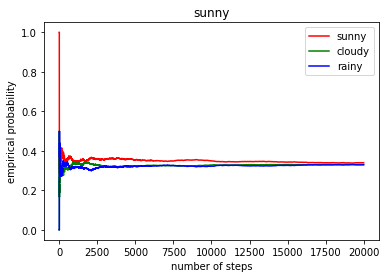

In [2]:
import matplotlib.pyplot as plt
dataX = np.arange(len(states))
dataX +=1
dataY = np.zeros(len(states)*3).reshape((3, len(states)))
for i in range(len(states)):
    dataY[0][i] = dataY[0][i-1]
    dataY[1][i] = dataY[1][i-1]
    dataY[2][i] = dataY[2][i-1]
    dataY[states[i]][i] += 1
#print(dataY,mask1)
#print(dataY, dataX)
plt.plot(dataX,dataY[0][:]/dataX[:],label='sunny', c='r')
plt.plot(dataX,dataY[1][:]/dataX[:],label='cloudy', c='g')
plt.plot(dataX,dataY[2][:]/dataX[:],label='rainy', c='b')
plt.title('sunny')
plt.xlabel('number of steps')
plt.ylabel('empirical probability')
plt.legend()
plt.show()

Задание 3. Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

In [4]:
p = transition_matrix
c = np.array((dataY[0][19999]/20000, dataY[1][19999]/20000, dataY[2][19999]/20000))
print('vector: ',c)
print('error1: ', c -p.dot(c)) #в этом случае ошибка меньше
#print('error1: ', c -c.dot(p)) 
for i in range(6):
    p = p.dot(p)
    #print(c - p[0][:]) # 6 итераций достаточно
#print(p[0][:],c)
print('error2: ', c - p[0][:]) #погрешность не большая

vector:  [0.3398 0.3307 0.3295]
error1:  [ 0.00376 -0.00237 -0.00242]
error2:  [-0.04908889 -0.00263333  0.05172222]


Задание 4. Примените алгоритм Metropolis для генерации выборки из смеси двух гауссиан. Плотность смеси задается в виде p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

In [6]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

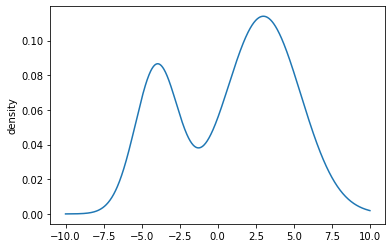

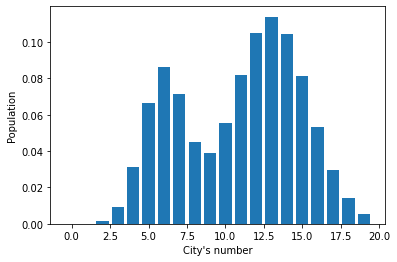

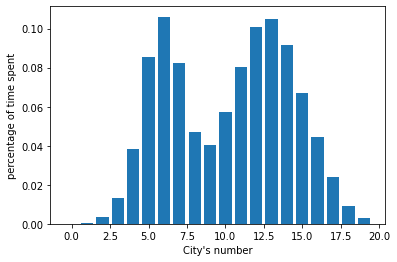

In [7]:
from scipy.stats import norm

x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
plt.plot(x, y)
plt.xlabel('')
plt.ylabel('density')
plt.show()
cities = [y[i*50] for i in range(20)]

plt.bar(np.arange(len(cities)), cities)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()

value = lambda x: cities[x]
proposal = lambda x: (x + np.random.choice([-1, 1])) % len(cities)
post = metroplis(1, value, proposal, 10000)

plt.hist(post, bins=np.arange(len(cities) + 1) - 0.5, rwidth=0.8, density=True)
plt.xlabel('City\'s number')
plt.ylabel('percentage of time spent')
plt.show()